# Automatización de los detalles para items de ArcGis online

## uso de la API de arcgis para Python
[Arcgis assistant](https://ago-assistant.esri.com/)

In [1]:
import arcgis
from arcgis.gis import GIS
import pandas as pd

## conexión a ArcGIS online
ejemplo de archivo `.env`
```
aol_key=this_is_a_key
aol_username=username
```

In [2]:
env_path = "../.env"
with open(env_path) as f:
    env = {}
    for line in f:
        env_key, _val = line.split("=")
        env_value = _val.split("\n")[0]
        env[env_key] = env_value
aol_password = env['aol_key']
aol_username = env['aol_username']

In [3]:
gis = GIS("https://carcem.maps.arcgis.com/", aol_username, aol_password)

## Resumen de proceso
- load csv with information
- use name of item to list items in org
- join pd with item id and information from csv
- update details

In [17]:
grupos_lista = gis.groups.search('title:1800', max_groups=15)
grupo = grupos_lista[0]
print(grupo.title)

Láminas plano de 1800


In [68]:
qe = f"title: Plano Villa y Corte Madrid 1800 owner:alvaromolina type:'Map Service'"
group_content = gis.content.advanced_search(query=qe)
#group_content['results']

In [65]:
lam_dict = {}
for item in group_content['results']:
    lam_dict[item.id] = item.title
        #print (f"title: {item.title}, type: {item.type}, id: {item.id}")

In [66]:
item_pub = pd.DataFrame.from_dict(lam_dict, orient='index')

In [67]:
item_pub.to_csv("laminas_publicadas.csv")

In [79]:
metadatos = pd.read_csv("metadatos capas plano 1800-Table 1.csv")
metadatos.head(2)

,item_id,start_title,Nombre de la capa,Resumen,Etiquetas,Descripción,Términos de uso,Créditos
0,278f9d34e0cf4dc59323d7124d86516c,Lámina 1. Barrio de las Descalzas Reales (Plan...,Lámina 1. Barrio de las Descalzas Reales (Plan...,"Georreferenciación del ""Plano de la Villa y Co...",Madrid; siglo XIX; cartografía histórica; WMTS...,Servicio de mapa teselado de las 64 ilustracio...,"<a href=""https://creativecommons.org/licenses/...",Autoría: Servicio WMTS creado por Álvaro Molin...
1,6deb0925eb2b45dda6b56b547cf5c075,02_Plano Villa y Corte Madrid 1800_Barrio de l...,Lámina 2. Barrio de los Ángeles (Plano de la V...,"Georreferenciación del ""Plano de la Villa y Co...",Madrid; siglo XIX; cartografía histórica; WMTS...,Servicio de mapa teselado de las 64 ilustracio...,"<a href=""https://creativecommons.org/licenses/...",Autoría: Servicio WMTS creado por Álvaro Molin...


In [90]:
metadatos_1 = metadatos[1:]
metadatos_1.head(2)

,item_id,start_title,Nombre de la capa,Resumen,Etiquetas,Descripción,Términos de uso,Créditos
1,6deb0925eb2b45dda6b56b547cf5c075,02_Plano Villa y Corte Madrid 1800_Barrio de l...,Lámina 2. Barrio de los Ángeles (Plano de la V...,"Georreferenciación del ""Plano de la Villa y Co...",Madrid; siglo XIX; cartografía histórica; WMTS...,Servicio de mapa teselado de las 64 ilustracio...,"<a href=""https://creativecommons.org/licenses/...",Autoría: Servicio WMTS creado por Álvaro Molin...
2,cdc49bade49c411fb20c4c868cf05854,03_Plano Villa y Corte Madrid 1800_Barrio de S...,Lámina 3. Barrio San Gines (Plano de la Villa ...,"Georreferenciación del ""Plano de la Villa y Co...",Madrid; siglo XIX; cartografía histórica; WMTS...,Servicio de mapa teselado de las 64 ilustracio...,"<a href=""https://creativecommons.org/licenses/...",Autoría: Servicio WMTS creado por Álvaro Molin...


In [94]:
for index, row in metadatos_1.iterrows():
    my_item = gis.content.get(row["item_id"])
    print(f"Nombre de la capa: {my_item.title}")
    print(f"Resumen: {my_item.snippet}")
    print(f"Descripción: {my_item.description}")
    print(f"new description: {row['Descripción']}")
    print(f"Términos de uso: {my_item.accessInformation}")
    print(f"Créditos: {my_item.licenseInfo}")
    print(f"Etiquetas: {my_item.tags}")
    break

Nombre de la capa: 02_Plano Villa y Corte Madrid 1800_Barrio de los Ángeles_jpg
Resumen: Georreferenciación del "Plano de la Villa y Corte de Madrid en sesenta y cuatro láminas […]" publicado en 1800 (lámina 2). Fondos de la Biblioteca Nacional de España
Descripción: 
new description: Servicio de mapa teselado de las 64 ilustraciones que componen la obra de Fausto Martínez de la Torre y Joseph Asensio Plano de la Villa y Corte de Madrid en sesenta y cuatro láminas, que demuestran otros tantos barrios en que está dividida, con los nombres de todas sus plazuelas y calles, números de las manzanas, y casas que comprehenden cada uno, con otras curiosidades útiles á los naturales y forasteros, Madrid, 1800, Imprenta de Don Joseph Doblado.
Cada lámina representa las manzanas que componen el barrio correspondiente, señalando el número de cada una de ellas en grande. Las cifras de menor tamaño indican la numeración de las casas existentes en cada una de las manzanas.
La publicación incluye la d

In [96]:
for index, row in metadatos_1.iterrows():
    my_item = gis.content.get(row["item_id"])
    item_properties = {'description' : {row['Descripción']},
                       'accessInformation' : {row['Créditos']},
                       'licenseInfo' : {row['Términos de uso']},
                       'title' : {row['Nombre de la capa']}
                      }
    my_item.update(item_properties)

TypeError: can only concatenate str (not "float") to str

## Arreglando el estilo de las urls en los créditos
Usar la propiedad de la primera lámina que se ve bien. 
`accessInformation` y `licenseInfo` estaban invertidas.
El error en la última linea de la tabla es porque se trata del servicio con todas las laminas a la vez.

In [97]:
for index, row in metadatos_1.iterrows():
    my_item = gis.content.get(row["item_id"])
    item_properties = {'accessInformation' : {row['Créditos']},
                       'licenseInfo' : {row['Términos de uso']},
                      }
    my_item.update(item_properties)

TypeError: can only concatenate str (not "float") to str

# Arreglando el formato del resumen
Usar las propiedades de la primera lámina que se hizo manualmente.

In [17]:
grupos_lista = gis.groups.search('title:1800', max_groups=15)
grupo = grupos_lista[0]
print(grupo.title)

Láminas plano de 1800


In [18]:
qe = f"title: Plano Villa y Corte Madrid 1800 owner:alvaromolina type:'Map Service'"
group_content = gis.content.advanced_search(query=qe)
#group_content['results']

In [19]:
lam_dict = {}
for item in group_content['results']:
    lam_dict[item.id] = item.title
    # print (f"title: {item.title}, type: {item.type}, id: {item.id}")

In [20]:
template_id = '278f9d34e0cf4dc59323d7124d86516c'

In [21]:
lam_dict[template_id]

'Lámina 1. Barrio de las Descalzas Reales (Plano de la Villa y Corte de Madrid, 1800)'

<Item title:"Lámina 1. Barrio de las Descalzas Reales (Plano de la Villa y Corte de Madrid, 1800)" type:Map Image Layer owner:alvaromolina>
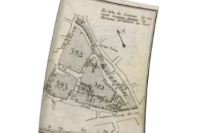

In [27]:
item_template = gis.content.get(template_id)
item_template

In [28]:
item_template.description

"Servicio de mapa teselado de las 64 ilustraciones que componen la obra de Fausto Martínez de la Torre y Joseph Asensio <span style='font-style:italic;'>Plano de la Villa y Corte de Madrid en sesenta y cuatro láminas, que demuestran otros tantos barrios en que está dividida, con los nombres de todas sus plazuelas y calles, números de las manzanas, y casas que comprehenden cada uno, con otras curiosidades útiles á los naturales y forasteros</span>, Madrid, 1800, Imprenta de Don Joseph Doblado.<br />Cada lámina representa las manzanas que componen el barrio correspondiente, señalando el número de cada una de ellas en grande. Las cifras de menor tamaño indican la numeración de las casas existentes en cada una de las manzanas.<br />La publicación incluye la descripción y limitación de cada barrio y cuartel, el callejero con el nombre de las calles, plazas y plazuelas, y una relación de edificios y lugares de interés de distinta naturaleza (parroquias, anexos, conventos, iglesias, ermitas, 

In [26]:
metadatos = pd.read_csv("metadatos capas plano 1800-Table 1.csv")
metadatos.head(2)

,item_id,start_title,Nombre de la capa,Resumen,Etiquetas,Descripción,Términos de uso,Créditos
0,278f9d34e0cf4dc59323d7124d86516c,Lámina 1. Barrio de las Descalzas Reales (Plan...,Lámina 1. Barrio de las Descalzas Reales (Plan...,"Georreferenciación del ""Plano de la Villa y Co...",Madrid; siglo XIX; cartografía histórica; WMTS...,Servicio de mapa teselado de las 64 ilustracio...,"<a href=""https://creativecommons.org/licenses/...",Autoría: Servicio WMTS creado por Álvaro Molin...
1,6deb0925eb2b45dda6b56b547cf5c075,02_Plano Villa y Corte Madrid 1800_Barrio de l...,Lámina 2. Barrio de los Ángeles (Plano de la V...,"Georreferenciación del ""Plano de la Villa y Co...",Madrid; siglo XIX; cartografía histórica; WMTS...,Servicio de mapa teselado de las 64 ilustracio...,"<a href=""https://creativecommons.org/licenses/...",Autoría: Servicio WMTS creado por Álvaro Molin...


In [29]:
metadatos_1 = metadatos[1:]
metadatos_1.head(2)

,item_id,start_title,Nombre de la capa,Resumen,Etiquetas,Descripción,Términos de uso,Créditos
1,6deb0925eb2b45dda6b56b547cf5c075,02_Plano Villa y Corte Madrid 1800_Barrio de l...,Lámina 2. Barrio de los Ángeles (Plano de la V...,"Georreferenciación del ""Plano de la Villa y Co...",Madrid; siglo XIX; cartografía histórica; WMTS...,Servicio de mapa teselado de las 64 ilustracio...,"<a href=""https://creativecommons.org/licenses/...",Autoría: Servicio WMTS creado por Álvaro Molin...
2,cdc49bade49c411fb20c4c868cf05854,03_Plano Villa y Corte Madrid 1800_Barrio de S...,Lámina 3. Barrio San Gines (Plano de la Villa ...,"Georreferenciación del ""Plano de la Villa y Co...",Madrid; siglo XIX; cartografía histórica; WMTS...,Servicio de mapa teselado de las 64 ilustracio...,"<a href=""https://creativecommons.org/licenses/...",Autoría: Servicio WMTS creado por Álvaro Molin...


In [30]:
for index, row in metadatos_1.iterrows():
    my_item = gis.content.get(row["item_id"])
    item_properties = {'description' : {item_template.description},
                       'title' : {row['Nombre de la capa']}
                      }
    my_item.update(item_properties)

TypeError: can only concatenate str (not "float") to str